<a href="https://colab.research.google.com/github/Cl8D/Python-Data-Analysis-Image-Processing/blob/main/16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **16강. KNN 알고리즘**

result :  [[1.]]
neighbours : [[1. 1. 0.]]
distance:  [[104. 386. 468.]]


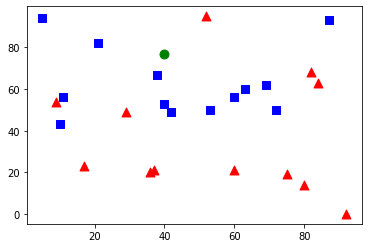

In [13]:
'''
예제 설명
- 총 25개의 데이터를 랜덤하게 만든다.
- 레이블은 2가지 존재한다. (빨간 세모 / 파란 네모)
- 세모는 0번 레이블, 네모는 1번 레이블이다.
- 이때, 임의의 초록색 데이터가 들어왔을 때 해당 데이터는 어떤 레이블에 속할까?
'''

import cv2
import numpy as np
from matplotlib import pyplot as plt

# 25개의 데이터를 2차원 공간에 배치.
# 각각의 값들은 0 ~ 100 사이의 임의의 값을 가진다.
trainData = np.random.randint(0, 100, (25, 2)).astype(np.float32)

# 25개의 데이터를 0 or 1로 배정하기
response = np.random.randint(0, 2, (25, 1)).astype(np.float32)

# 레이블이 0인 데이터 찾기
red = trainData[response.ravel() == 0]
# 해당 데이터의 위치에 맞게 빨간색 세모로 색을 칠해줌.
# 여기서 80은 marker에 해당하는 값. (크기)
plt.scatter(red[:, 0], red[:, 1], 80, 'r', '^')

# 레이블이 1인 데이터 찾기
blue = trainData[response.ravel() == 1]
# 해당 데이터의 위치에 맞게 파란색 네모로 색을 칠해준다.
plt.scatter(blue[:, 0], blue[:, 1], 80, 'b', 's')

# (0 ~ 100, 0 ~ 100) 위치에 데이터를 하나 추가해 주기
newcomer = np.random.randint(0, 100, (1, 2)).astype(np.float32)
# 해당 데이터의 위치에 초록색 동그라미로 색칠하기.
plt.scatter(newcomer[:, 0], newcomer[:, 1], 80, 'g', 'o')

# KNearest_create 함수를 이용하여 KNN 객체 생성하기
knn = cv2.ml.KNearest_create()
# 기존에 존재하는 25개의 데이터를 이용해 초기화. 데이터의 레이블을 이용함.
knn.train(trainData, cv2.ml.ROW_SAMPLE, response)
# k=3일 때, 가장 가까운 3개의 데이터를 골라서 결과를 가져오기
ret, results, neighbours, dist = knn.findNearest(newcomer, 3)

print("result : ", results) #어떤 색으로 분류되는지 알려줌.
print("neighbours :", neighbours) #가장 가까운 데이터 3개를 알려준다
print("distance: ", dist) #각각의 데이터의 거리를 출력

plt.show()

result :  red
neighbours : [[1. 0. 1.]]
distance:  [[ 85. 445. 881.]]


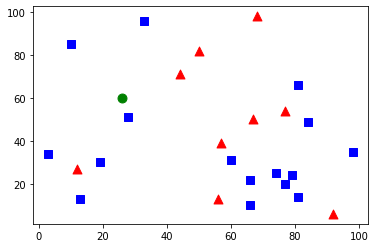

In [26]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 25개의 데이터를 2차원 공간에 배치.
# 각각의 값들은 0 ~ 100 사이의 임의의 값을 가진다.
trainData = np.random.randint(0, 100, (25, 2)).astype(np.float32)

# 25개의 데이터를 0 or 1로 배정하기
response = np.random.randint(0, 2, (25, 1)).astype(np.float32)

# 레이블이 0인 데이터 찾기
red = trainData[response.ravel() == 0]
# 해당 데이터의 위치에 맞게 빨간색 세모로 색을 칠해줌.
# 여기서 80은 marker에 해당하는 값. (크기)
plt.scatter(red[:, 0], red[:, 1], 80, 'r', '^')

# 레이블이 1인 데이터 찾기
blue = trainData[response.ravel() == 1]
# 해당 데이터의 위치에 맞게 파란색 네모로 색을 칠해준다.
plt.scatter(blue[:, 0], blue[:, 1], 80, 'b', 's')

# (0 ~ 100, 0 ~ 100) 위치에 데이터를 하나 추가해 주기
newcomer = np.random.randint(0, 100, (1, 2)).astype(np.float32)
# 해당 데이터의 위치에 초록색 동그라미로 색칠하기.
plt.scatter(newcomer[:, 0], newcomer[:, 1], 80, 'g', 'o')

# KNearest_create 함수를 이용하여 KNN 객체 생성하기
knn = cv2.ml.KNearest_create()
# 기존에 존재하는 25개의 데이터를 이용해 초기화. 데이터의 레이블을 이용함.
knn.train(trainData, cv2.ml.ROW_SAMPLE, response)
# k=3일 때, 가장 가까운 3개의 데이터를 골라서 결과를 가져오기
ret, results, neighbours, dist = knn.findNearest(newcomer, 3)

if results == 0 :
  results = 'blue'
else :
  results = 'red'

print("result : ", results) #어떤 색으로 분류되는지 알려줌.
print("neighbours :", neighbours) #가장 가까운 데이터 3개를 알려준다
print("distance: ", dist) #각각의 데이터의 거리를 출력

plt.show()